In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin
import pandas as pd

In [3]:
def find_a_b(x1,y1,x2,y2):
    a = (y2-y1)/(x2-x1)
    b = y1 - a*x1
    return a,b

def prove (a1, b1, a2, b2):
    A = np.array([[-a1, 1],[-a2,1]])
    b = np.array([[b1],[b2]])
    sol = np.dot(lin.inv(A),b)
    return sol[0,0], sol[1,0]

In [16]:
# in z_y plane!!! mean X => z , Y => y
### in this calcul, lens effect are eliminated!!! 

#put real screen center at y = 0, z = 0
#lens are putted on z = lens distance from screen!!


res = 11 # resolution of screen
###___________#____________#__________#________#_____#_______#
lens_dist = 5           #distance from lens to screen
theta = 0.1 * np.pi     # shooting degree, y_direction,
cam_dist = 10           # distance from lens to camera!!! 
cam_wd = 8              # camera working distance!!
cam_ang = 0.1 * np.pi  # camera angle width
scr_h = 8              # height of the real screen!!
rad_eye = 1.1          #radius of the eye!!

eye_z  = 6             # eye`s z position
eye_y  = 3             # eye`s y position
#___________________________________________________________#



cam_z = -np.cos(theta)*cam_dist+lens_dist
cam_y = -np.sin(theta)*cam_dist
im_cen_z = cam_z + (eye_z - cam_z)*(cam_wd/cam_dist)
im_cen_y = cam_y + (eye_y - cam_y)*(cam_wd/cam_dist)
im_plane_end1= ipe1 = (im_cen_z - (cam_wd / np.cos(cam_ang)*(np.sin(cam_ang)))*np.sin(theta), im_cen_y + (cam_wd / np.cos(cam_ang)*np.sin(cam_ang))*np.cos(theta) )
im_plane_end2= ipe2 = (im_cen_z + (cam_wd / np.cos(cam_ang)*(np.sin(cam_ang)))*np.sin(theta), im_cen_y - (cam_wd / np.cos(cam_ang)*np.sin(cam_ang))*np.cos(theta) )


scr_h_ar = np.linspace(-scr_h*0.5,scr_h*0.5,num = res)
scr_z_ar = np.zeros_like(scr_h_ar)
gaze_on_eye_z = gaze_on_eye_y = np.zeros_like(scr_h_ar)

gaze_on_eye_z = eye_z + (scr_z_ar - eye_z)*rad_eye/np.sqrt((eye_z - scr_z_ar) **2 + (eye_y - scr_h_ar)**2)
gaze_on_eye_y = eye_y + (scr_h_ar - eye_y)*rad_eye/np.sqrt((eye_z - scr_z_ar) **2 + (eye_y - scr_h_ar)**2)

#__________________________________________________________#

ab_imp = find_a_b(ipe1[0], ipe1[1], ipe2[0], ipe2[1])
ab_pupil_on_image = np.zeros((len(scr_z_ar),2))
for i in range(len(scr_z_ar)):
    ab_pupil_on_image[i] = find_a_b(cam_z, cam_y, gaze_on_eye_z[i], gaze_on_eye_y[i])

sol_x_y = np.zeros((len(scr_z_ar),2))  # solution point on image plane!!! 
for i in range(len(scr_z_ar)):
    sol_x_y[i] = prove(ab_imp[0],ab_imp[1],ab_pupil_on_image[i][0],ab_pupil_on_image[i][1])

img_pl_height = np.sqrt((ipe1[0]-ipe2[0])**2 + (ipe1[1]-ipe2[1])**2)  # total height of imageplane!!
dist_img_pl = np.zeros(len(scr_z_ar))                           
for i in range(len(scr_z_ar)):
    dist_img_pl[i] = np.sqrt((ipe1[0]-sol_x_y[i][0])**2 + (ipe1[1]-sol_x_y[i][1])**2)
    # distnce from top point of img_plane to solution point

pix_point = dist_img_pl / img_pl_height * 480     # pixel point conversion!! -> from the top position!!

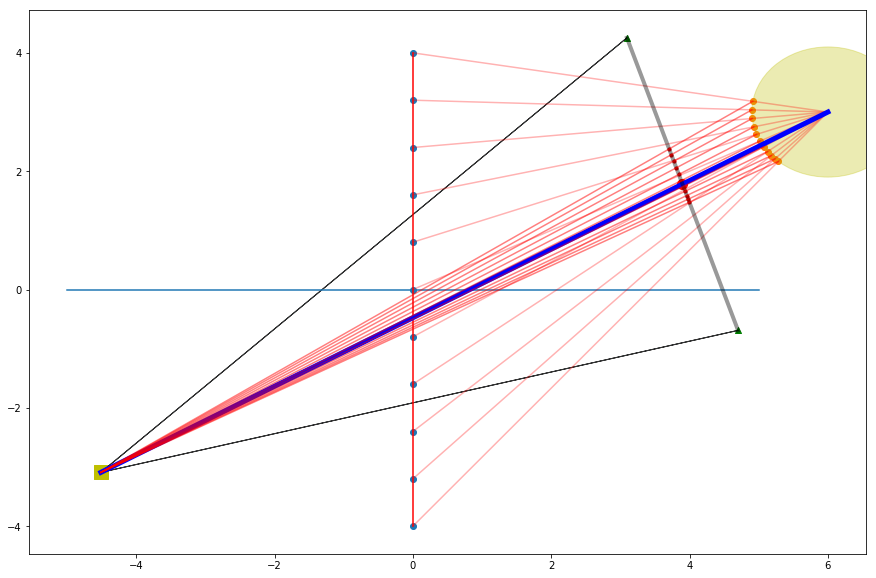

In [21]:
circle = plt.Circle((eye_z, eye_y), rad_eye, color='y',alpha = 0.3)

plt.figure(figsize=(15,10))


ax = plt.gca()
ax.cla() # clear things for fresh plot
ax.plot([-cam_dist+lens_dist,lens_dist],[0,0])
ax.plot([0,0],[-scr_h/2,scr_h/2],color="r") # screen!!
ax.scatter(scr_z_ar,scr_h_ar)    # gaze vector solution point at screen
ax.scatter(gaze_on_eye_z,gaze_on_eye_y) # gaze vector solution point at eye
ax.scatter(cam_z,cam_y,c="y",marker="s",s=200)     #camera!!! 
ax.add_artist(circle)
for i in range(len(scr_h_ar)):
    ax.plot([scr_z_ar[i], eye_z], [scr_h_ar[i],eye_y], alpha = 0.3,c="r")
ax.plot([cam_z,eye_z], [cam_y, eye_y], c = "b", lw = 5 )  # camera center line to eye center
ax.scatter(im_cen_z, im_cen_y ,c="r",s=100 )

ax.scatter(im_plane_end1[0],im_plane_end1[1],c="g",marker="^" ) # image plane end point
ax.scatter(im_plane_end2[0], im_plane_end2[1],c="g",marker="^" ) # image plane end point

ax.plot([ipe1[0],ipe2[0]], [ipe1[1],ipe2[1]],lw = 4, c = "k", alpha=0.4) # image plane
ax.arrow(cam_z, cam_y, (ipe1[0]-cam_z), (ipe1[1]-cam_y), alpha = 0.8)  # camera angle range line
ax.arrow(cam_z, cam_y, (ipe2[0]-cam_z), (ipe2[1]-cam_y), alpha = 0.8)  # camera angle range line

for i in range(len(gaze_on_eye_z)):
    ax.plot([cam_z,gaze_on_eye_z[i]], [cam_y,gaze_on_eye_y[i]], c = "r", alpha = 0.5)
    
for i in range(len(gaze_on_eye_z)):
    ax.scatter(sol_x_y[i][0],sol_x_y[i][1], c = "r", s = 10)

plt.show()

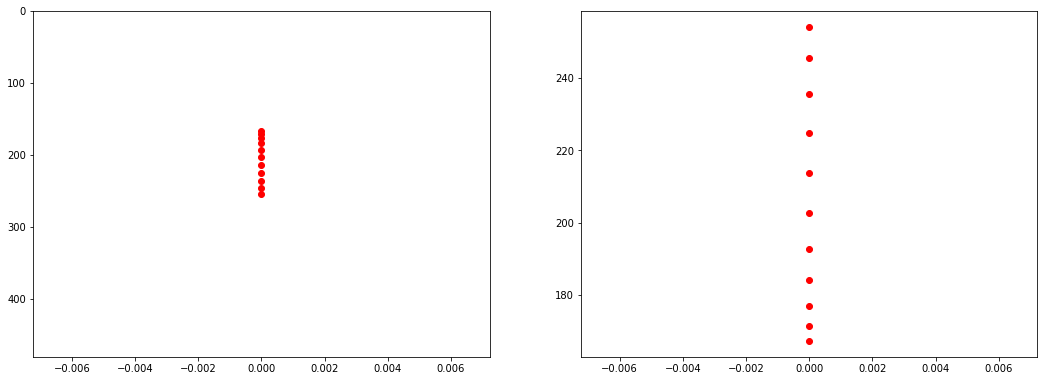

[ 254.25993545  245.45833904  235.56491378  224.82515972  213.69289358
  202.78126676  192.72607113  184.01815858  176.89721779  171.35385418
  167.20954817]


In [11]:
a_a = np.zeros(len(gaze_on_eye_y))
plt.figure(figsize =(18,14))
plt.subplot(2,2,1)
plt.scatter(a_a,pix_point,c="r")
plt.ylim([480,0])


plt.subplot(2,2,2)
plt.scatter(a_a,pix_point,c="r")
plt.show()
print(pix_point)